# Multi-Task Test
At first we have to install the newest version of fvGP

In [1]:
##First, install the newest version of fvgp
#!pip install fvgp~=4.6.12
#!pip install plotly

## Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from fvgp import GP
import plotly.graph_objects as go
from itertools import product
import plotly.io as pio
pio.renderers.default = "png"
%load_ext autoreload
%autoreload 2

## Simple 1d Example

### Data

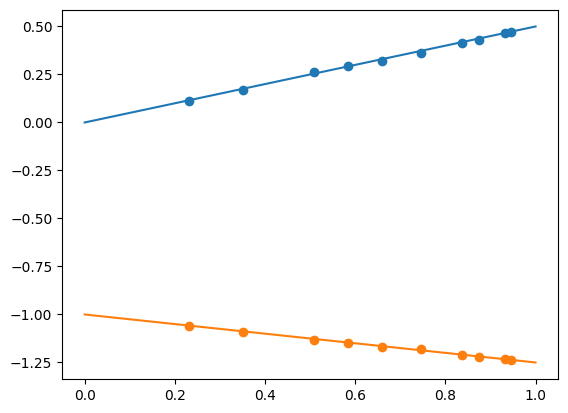

In [3]:
def f1(x): return 0.5 * x
def f2(x): return (-.25 * x) - 1.

x_pred1d = np.linspace(0,1,50)
plt.plot(x_pred1d,f1(x_pred1d))
plt.plot(x_pred1d,f2(x_pred1d))
x_data = np.random.rand(10)
y_data1 = f1(x_data) + np.random.uniform(low = -0.01, high = 0.01, size =len(x_data))
y_data2 = f2(x_data) + np.random.uniform(low = -0.01, high = 0.01, size =len(x_data))
plt.scatter(x_data,y_data1) 
plt.scatter(x_data,y_data2) 
plt.show()

### GP initialization

In [4]:
from fvgp import fvGP

my_gp2 = fvGP(x_data.reshape(len(x_data),1), np.column_stack([y_data1, y_data2]))
print("Global Training in progress")
my_gp2.train(max_iter = 20, info=True)




Global Training in progress
Finished  10  out of  20  MCMC iterations. f(x)=  47.242895645146504


/home/marcus/Coding/fvGP/fvgp/gp.py:251: UserWarning:

Hyperparameters initialized to a vector of ones.

/home/marcus/Coding/fvGP/fvgp/gp.py:297: UserWarning:

No noise function or measurement noise provided. Noise variances will be set to (0.01 * mean(|y_data|))^2.

/home/marcus/Coding/fvGP/fvgp/gp.py:544: UserWarning:

Default hyperparameter_bounds initialized because none were provided. This will fail for custom kernel, mean, or noise functions



array([1.70056439, 5.24811482, 2.78993177])

In [5]:
print(my_gp2.x_data)
print(my_gp2.y_data)

[[0.58305416 0.        ]
 [0.23189606 0.        ]
 [0.50836965 0.        ]
 [0.74534262 0.        ]
 [0.94599344 0.        ]
 [0.87379682 0.        ]
 [0.6589778  0.        ]
 [0.93196508 0.        ]
 [0.3501689  0.        ]
 [0.83620729 0.        ]
 [0.58305416 1.        ]
 [0.23189606 1.        ]
 [0.50836965 1.        ]
 [0.74534262 1.        ]
 [0.94599344 1.        ]
 [0.87379682 1.        ]
 [0.6589778  1.        ]
 [0.93196508 1.        ]
 [0.3501689  1.        ]
 [0.83620729 1.        ]]
[ 0.29507359  0.11444858  0.26054216  0.36342637  0.47125475  0.42932394
  0.3218205   0.46573826  0.1716192   0.41161133 -1.14917487 -1.06054095
 -1.13125516 -1.18121699 -1.2382385  -1.22126103 -1.16880349 -1.23109537
 -1.09218744 -1.20992031]


### Predictions

In [6]:
y_test = np.hstack([f1(x_pred1d).reshape(len(x_pred1d),1),f2(x_pred1d).reshape(len(x_pred1d),1)])
print("RMSE:              ", my_gp2.rmse(x_pred1d.reshape(len(x_pred1d),1),y_test))
print("NLPD:              ", my_gp2.nlpd(x_pred1d.reshape(len(x_pred1d),1),y_test))
print("R2:                ", my_gp2.r2(x_pred1d.reshape(len(x_pred1d),1),y_test))
print("CRPS (mean, std):  ", my_gp2.crps(x_pred1d.reshape(len(x_pred1d),1),y_test))

RMSE:               0.0044677824145204935
NLPD:               -3.784822694147658
R2:                 0.9999589454363337
CRPS (mean, std):   (np.float64(0.003102493496191179), np.float64(0.002324543998867003))


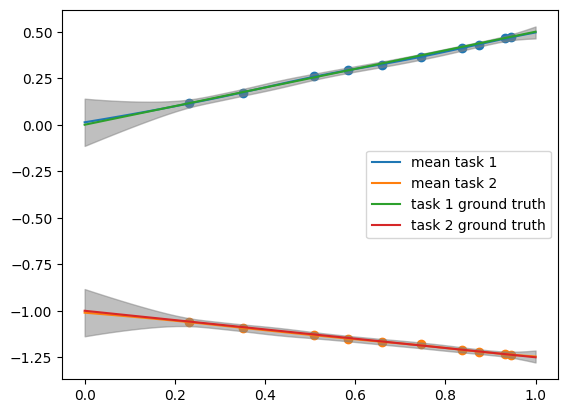

In [7]:
#mean and standard deviation
mean = my_gp2.posterior_mean(x_pred=x_pred1d.reshape(50,1))["m(x)"]
std = np.sqrt(my_gp2.posterior_covariance(x_pred=x_pred1d.reshape(50,1), x_out=np.array([0,1]))["v(x)"])


plt.plot(x_pred1d.reshape(50,1),mean[:,0], label = "mean task 1")
plt.plot(x_pred1d.reshape(50,1),mean[:,1], label = "mean task 2")
plt.scatter(x_data,y_data1) 
plt.scatter(x_data,y_data2) 
plt.plot(x_pred1d,f1(x_pred1d), label = "task 1 ground truth")
plt.plot(x_pred1d,f2(x_pred1d), label = "task 2 ground truth")
plt.fill_between(x_pred1d, mean[:,0] - 3. * std[:,0], mean[:,0] + 3. * std[:,0], alpha = 0.5, color = "grey")
plt.fill_between(x_pred1d, mean[:,1] - 3. * std[:,1], mean[:,1] + 3. * std[:,1], alpha = 0.5, color = "grey")
plt.legend()
plt.show()

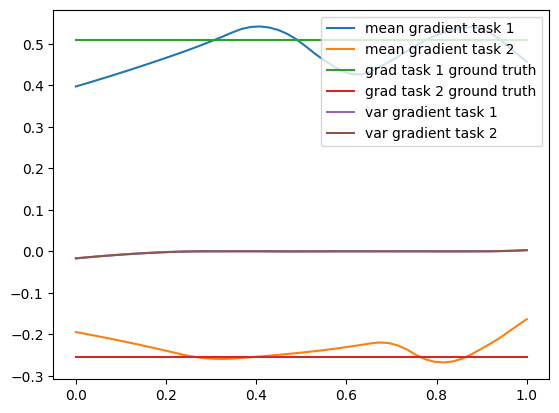

In [8]:
#mean gradient and variance gradient
mean_grad = my_gp2.posterior_mean_grad(x_pred=x_pred1d.reshape(50,1), x_out=np.array([0,1]))["dm/dx"]
var_grad = my_gp2.posterior_covariance_grad(x_pred=x_pred1d.reshape(50,1), x_out=np.array([0,1]))["dv/dx"]

plt.plot(x_pred1d.reshape(50,1),mean_grad[:,0,0], label = "mean gradient task 1")
plt.plot(x_pred1d.reshape(50,1),mean_grad[:,0,1], label = "mean gradient task 2")
plt.plot(x_pred1d,np.gradient(f1(x_pred1d), 1./50.), label = "grad task 1 ground truth")
plt.plot(x_pred1d,np.gradient(f2(x_pred1d), 1./50.), label = "grad task 2 ground truth")
plt.plot(x_pred1d.reshape(50,1),var_grad[:,0,0], label = "var gradient task 1")
plt.plot(x_pred1d.reshape(50,1),var_grad[:,0,1], label = "var gradient task 2")
plt.legend()
plt.show()

### What if some tasks are missing from the data

#### It works just fine, but we have to insert np.nan at positions of missing data, both for y and the variances. 

In [9]:
y_data = np.column_stack([y_data1, y_data2])
noise_variances = np.zeros(y_data.shape) + 0.01
y_data[2,0] = np.nan
noise_variances[2,0] = np.nan

y_data[6,1] = np.nan
noise_variances[6,1] = np.nan

my_gp2 = fvGP(x_data.reshape(len(x_data),1), y_data, noise_variances=noise_variances)
print("Global Training in progress")
my_gp2.train(max_iter = 20)

Global Training in progress


array([1.70779732, 6.15728963, 1.59926534])

## 3d Example

### Data

In [10]:
data = np.load("./data/sim_variable_mod.npy")
sparsification = 32

x_data3 = data[:,5:][::sparsification]
y_data3 = data[:,0:3][::sparsification]

#it is good practice to check the format of the data
print(x_data3.shape)
print(y_data3.shape)

(198, 3)
(198, 3)


In [11]:
x = np.linspace(30,100,100)
y = np.linspace(40,130,100)
x_pred3D = np.asarray(list(product(x, y)))
x_pred3D = np.column_stack([x_pred3D, np.zeros((len(x_pred3D),1)) + 300.])

In [12]:
def scatter(x,y,z,size=3, color = 1):
    #if not color: color = z
    fig = go.Figure()
    fig.add_trace(go.Scatter3d(x=x, y=y, z=z,mode='markers',marker=dict(color=color, size = size)))
    
    
    fig.update_layout(autosize=False,
                  width=800, height=800,
                  font=dict(size=18,),
                  margin=dict(l=0, r=0, b=0, t=0))
    fig.show()

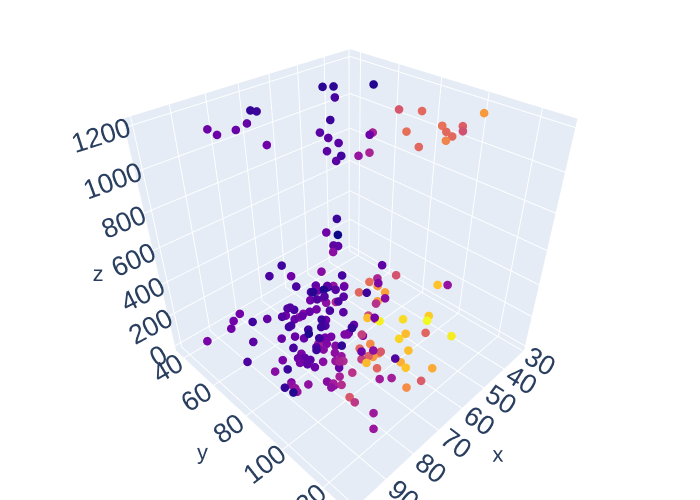

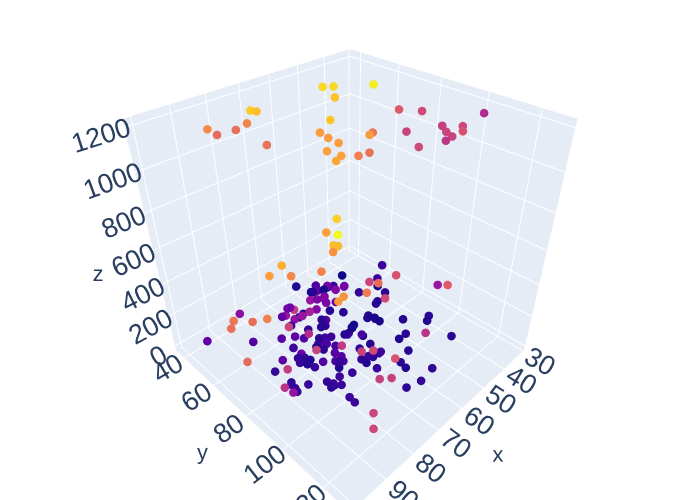

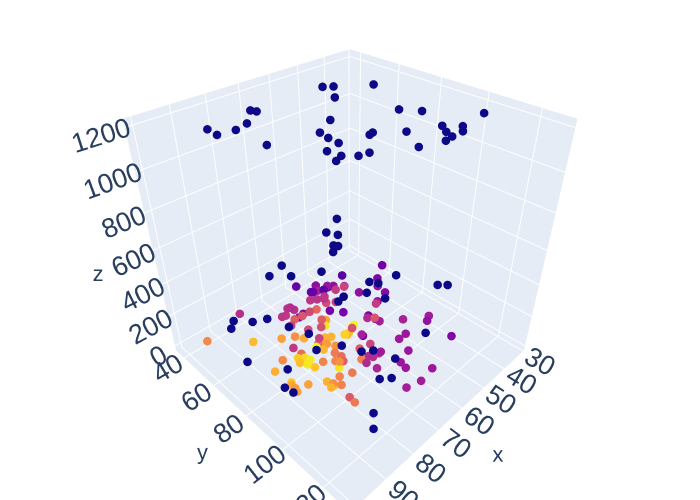

In [13]:
scatter(x_data3[:,0],x_data3[:,1],x_data3[:,2], size = 5, color = y_data3[:,0])
scatter(x_data3[:,0],x_data3[:,1],x_data3[:,2], size = 5, color = y_data3[:,1])
scatter(x_data3[:,0],x_data3[:,1],x_data3[:,2], size = 5, color = y_data3[:,2])

### Initialization

#### (a) Default behavior

In [14]:
from fvgp import fvGP

my_gp2 = fvGP(x_data3,y_data3)
print("Global Training in progress")
my_gp2.train(max_iter = 2)

Global Training in progress


/home/marcus/Coding/fvGP/fvgp/gp.py:251: UserWarning:

Hyperparameters initialized to a vector of ones.

/home/marcus/Coding/fvGP/fvgp/gp.py:297: UserWarning:

No noise function or measurement noise provided. Noise variances will be set to (0.01 * mean(|y_data|))^2.

/home/marcus/Coding/fvGP/fvgp/gp.py:544: UserWarning:

Default hyperparameter_bounds initialized because none were provided. This will fail for custom kernel, mean, or noise functions



array([2.29663162e-01, 4.49822461e+01, 2.62858868e+02, 1.05599777e+04,
       1.64770902e+01])

#### (b) Custom kernel
It is vital in the multi-task case to think hard about kernel design. The kernel is now a function
over X x X x T x T, where X is the input and T is the output space. Print the input of the kernel, it will have the dimensionality of this cartesian product space. 
The default kernel in fvgp is just a Matern kernel operating in this new space.

In [15]:
#A simple kernel that won't lead to good performance because it's stationary
from fvgp.kernels import *
def mkernel(x1,x2,hps):
    d = get_distance_matrix(x1,x2)
    return hps[0] * matern_kernel_diff1(d,hps[1])

In [16]:
my_gp2 = fvGP(x_data3,y_data3,
              init_hyperparameters=np.ones((2)), kernel_function=mkernel
             )
print("MCMC Training in progress")


bounds = np.array([[0.01,1.],[0.01,1.]])
my_gp2.train(hyperparameter_bounds=bounds,max_iter = 20)

MCMC Training in progress


array([0.23265769, 0.13149973])

#### (c) A custom deep kernel

In [17]:
from fvgp.deep_kernel_network import *
iset_dim = 4
gp_deep_kernel_layer_width = 5
n = Network(iset_dim, gp_deep_kernel_layer_width)
print(n.number_of_hps)

def deep_multi_task_kernel(x1, x2, hps):  # pragma: no cover
    signal_var = hps[0]
    length_scale = hps[1]
    hps_nn = hps[2:]
    w1_indices = np.arange(0, gp_deep_kernel_layer_width * iset_dim)
    last = gp_deep_kernel_layer_width * iset_dim
    w2_indices = np.arange(last, last + gp_deep_kernel_layer_width ** 2)
    last = last + gp_deep_kernel_layer_width ** 2
    w3_indices = np.arange(last, last + gp_deep_kernel_layer_width * iset_dim)
    last = last + gp_deep_kernel_layer_width * iset_dim
    b1_indices = np.arange(last, last + gp_deep_kernel_layer_width)
    last = last + gp_deep_kernel_layer_width
    b2_indices = np.arange(last, last + gp_deep_kernel_layer_width)
    last = last + gp_deep_kernel_layer_width
    b3_indices = np.arange(last, last + iset_dim)

    n.set_weights(hps_nn[w1_indices].reshape(gp_deep_kernel_layer_width, iset_dim),
                  hps_nn[w2_indices].reshape(gp_deep_kernel_layer_width, gp_deep_kernel_layer_width),
                  hps_nn[w3_indices].reshape(iset_dim, gp_deep_kernel_layer_width))
    n.set_biases(hps_nn[b1_indices].reshape(gp_deep_kernel_layer_width),
                 hps_nn[b2_indices].reshape(gp_deep_kernel_layer_width),
                 hps_nn[b3_indices].reshape(iset_dim))
    x1_nn = n.forward(x1)
    x2_nn = n.forward(x2)
    d = get_distance_matrix(x1_nn, x2_nn)
    k = signal_var * matern_kernel_diff1(d, length_scale)
    return k


my_gp2 = fvGP(x_data3,y_data3,
              init_hyperparameters=np.ones((n.number_of_hps+2)), kernel_function=deep_multi_task_kernel
             )
print("Global Training in progress")


bounds = np.zeros((n.number_of_hps+2,2))
bounds[0] = np.array([0.1,10.])
bounds[1] = np.array([0.1,10.])
bounds[2:] = np.array([0.01,1])
my_gp2.train(hyperparameter_bounds=bounds,max_iter = 4, method="global", info = True)

79
Global Training in progress


/home/marcus/Coding/fvGP/fvgp/gp.py:297: UserWarning:

No noise function or measurement noise provided. Noise variances will be set to (0.01 * mean(|y_data|))^2.



differential_evolution step 1: f(x)= -49.16286407208861
differential_evolution step 2: f(x)= -49.16286407208861
differential_evolution step 3: f(x)= -49.16286407208861
differential_evolution step 4: f(x)= -49.16286407208861


array([0.10083262, 1.83338426, 0.24322335, 0.23487644, 0.11547555,
       0.87796357, 0.2637715 , 0.05715753, 0.34909674, 0.32748539,
       0.04299655, 0.88886796, 0.44824808, 0.1783809 , 0.14042034,
       0.96393163, 0.88112675, 0.10952755, 0.08164949, 0.49567349,
       0.1586828 , 0.77966697, 0.05164809, 0.68626716, 0.49719418,
       0.67144781, 0.68900393, 0.04770162, 0.62313223, 0.64505387,
       0.57919618, 0.25710706, 0.12821611, 0.78858175, 0.27519863,
       0.46142509, 0.17368984, 0.08112911, 0.77117527, 0.62990341,
       0.77362213, 0.6045726 , 0.10635145, 0.08310285, 0.26140117,
       0.0781643 , 0.2192319 , 0.4969441 , 0.94035331, 0.85863454,
       0.02566147, 0.18573014, 0.95326489, 0.14020856, 0.3570904 ,
       0.55512552, 0.27336786, 0.19147477, 0.8028594 , 0.7678243 ,
       0.76808827, 0.71042474, 0.22509191, 0.57695484, 0.10544337,
       0.88092415, 0.70891355, 0.13155646, 0.2798204 , 0.59453242,
       0.74727268, 0.54028801, 0.82984114, 0.91515593, 0.47852

### Prediction

In [18]:
#first task
mean1 = my_gp2.posterior_mean(x_pred3D, x_out = np.zeros((1)))["m(x)"]
var1 =  my_gp2.posterior_covariance(x_pred3D, x_out = np.zeros((1)))["v(x)"]

#second task
mean2 = my_gp2.posterior_mean(x_pred3D, x_out = np.zeros((1)) + 1)["m(x)"]
var2 =  my_gp2.posterior_covariance(x_pred3D, x_out = np.zeros((1))+1)["v(x)"]

#third task
mean3 = my_gp2.posterior_mean(x_pred3D, x_out = np.zeros((1)) + 2)["m(x)"]
var3 =  my_gp2.posterior_covariance(x_pred3D, x_out = np.zeros((1))+2)["v(x)"]

##we could have also called this for all tasks
#mean = my_gp2.posterior_mean(x_pred3D, x_out = np.array([0,1,2]))["f(x)"]
#var =  my_gp2.posterior_covariance(x_pred3D, x_out = np.array([0,1,2]))["v(x)"]

In [19]:
#extract data point to compare to:
index300 = np.where(x_data3[:,2]==300.)
imageX_data = x_data3[index300]
imageY_data = y_data3[index300]
#print(y_data3)

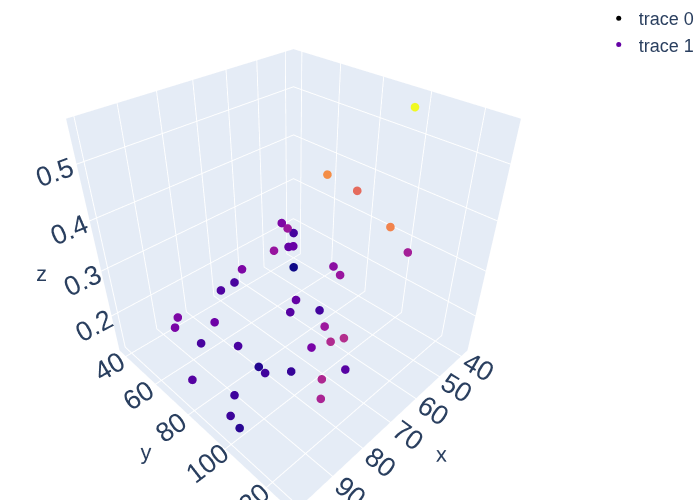

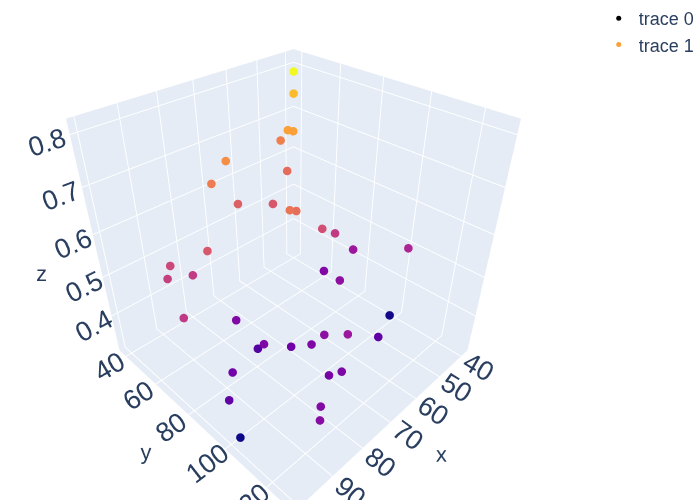

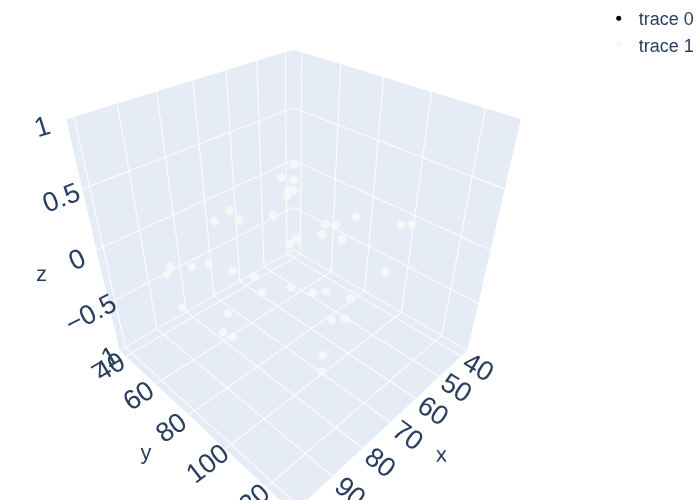

In [20]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=x_pred3D[:,0],y=x_pred3D[:,1], z=mean1,
                             mode='markers',marker=dict(color=mean1, size = 5)))
fig.add_trace(go.Scatter3d(x=imageX_data[:,0], y=imageX_data[:,1] , z=imageY_data[:,0],
                           mode='markers',marker=dict(color=imageY_data[:,0], size = 5)))
fig.update_layout(autosize=False,
                  width=800, height=800,
                  font=dict(size=18,),
                  margin=dict(l=0, r=0, b=0, t=0))
fig.show()



fig = go.Figure()
fig.add_trace(go.Scatter3d(x=x_pred3D[:,0], y=x_pred3D[:,1], z=mean2,
                           mode='markers',marker=dict(color=mean2, size = 5)))
fig.add_trace(go.Scatter3d(x=imageX_data[:,0], y=imageX_data[:,1], z=imageY_data[:,1],
                           mode='markers',marker=dict(color=imageY_data[:,1], size = 5)))
fig.update_layout(autosize=False,
                  width=800, height=800,
                  font=dict(size=18,),
                  margin=dict(l=0, r=0, b=0, t=0))
fig.show()

fig = go.Figure()
fig.add_trace(go.Scatter3d(x=x_pred3D[:,0], y=x_pred3D[:,1], z=mean3,
                           mode='markers',marker=dict(color=mean3, size = 5)))
fig.add_trace(go.Scatter3d(x=imageX_data[:,0], y=imageX_data[:,1], z=imageY_data[:,2],
                           mode='markers',marker=dict(color=imageY_data[:,2], size = 5)))
fig.update_layout(autosize=False,
                  width=800, height=800,
                  font=dict(size=18,),
                  margin=dict(l=0, r=0, b=0, t=0))
fig.show()

